Data Loading

In [1]:
import pandas as pd

In [2]:
test_df = pd.read_csv(r'test.csv')
train_df = pd.read_csv(r'train.csv')

In [29]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,male,34.50000,0,0,7.8292,Q,1,1
1,3,female,47.00000,1,0,7.0000,S,2,0
2,2,male,62.00000,0,0,9.6875,Q,1,1
3,3,male,27.00000,0,0,8.6625,S,1,1
4,3,female,22.00000,1,1,12.2875,S,3,0
...,...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S,1,1
414,1,female,39.00000,0,0,108.9000,C,1,1
415,3,male,38.50000,0,0,7.2500,S,1,1
416,3,male,30.27259,0,0,8.0500,S,1,1


In [24]:
test_df.dtypes

Pclass          int64
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
FamilySize      int64
IsAlone         int64
dtype: object

In [28]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.000000,1,0,7.2500,S,2,0
1,1,1,female,38.000000,1,0,71.2833,C,2,0
2,1,3,female,26.000000,0,0,7.9250,S,1,1
3,1,1,female,35.000000,1,0,53.1000,S,2,0
4,0,3,male,35.000000,0,0,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,1
887,1,1,female,19.000000,0,0,30.0000,S,1,1
888,0,3,female,29.699118,1,2,23.4500,S,4,0
889,1,1,male,26.000000,0,0,30.0000,C,1,1


In [6]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data preprocessing

In [8]:
def preprocess_data(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = 1
    df['IsAlone'].loc[df['FamilySize'] > 1] = 0
    # Filling NaN
    df['Embarked'] = df['Embarked'].fillna('S')
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    
    #Dropping data we do not need
    df = df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1)
    return df

train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)


C:\Users\mexzo\AppData\Local\Temp\ipykernel_16152\211774056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsAlone'].loc[df['FamilySize'] > 1] = 0
C:\Users\mexzo\AppData\Local\Temp\ipykernel_16152\211774056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsAlone'].loc[df['FamilySize'] > 1] = 0


Data corr visualisation

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразование категориальных признаков в числовые для корреляции
def encode_for_correlation(df):
    df_encoded = df.copy()
    df_encoded = df_encoded.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1)
    df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
    df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    return df_encoded

# Загрузка данных
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Преобразование данных для корреляции
train_data_encoded = encode_for_correlation(train_data)
test_data_encoded = encode_for_correlation(test_data)


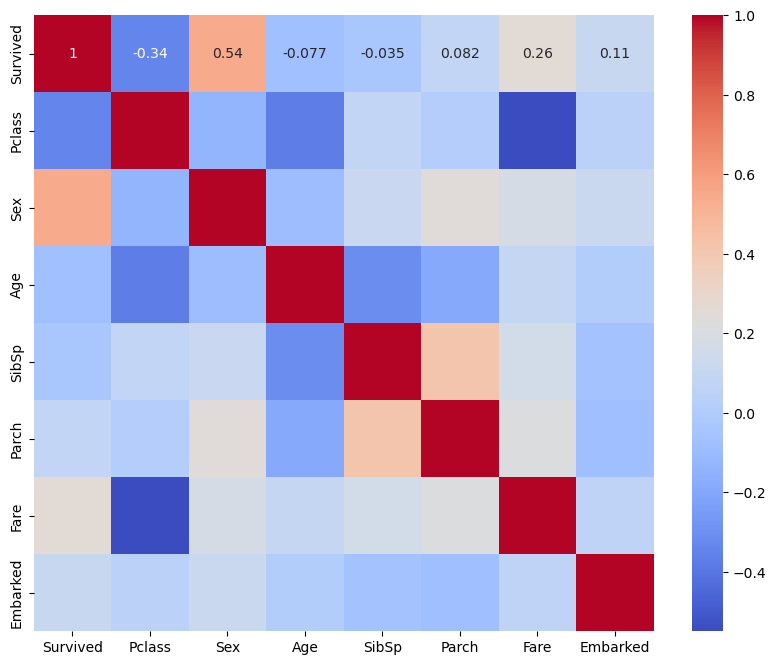

In [10]:


# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(train_data_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

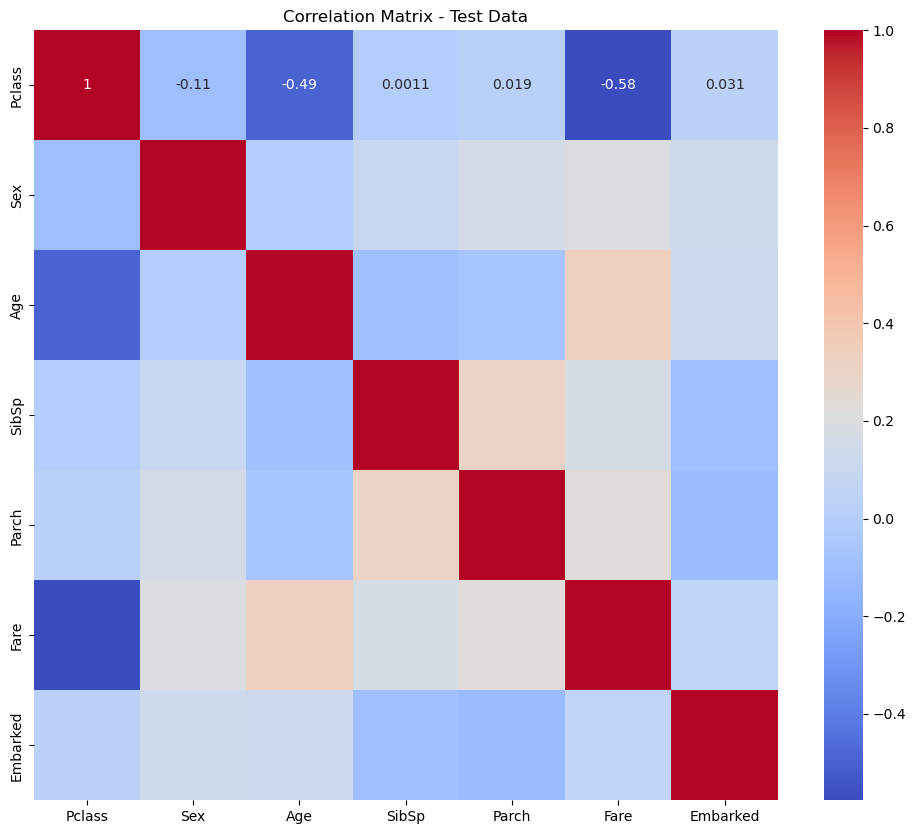

In [11]:

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(test_data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Test Data')
plt.show()

Data Split

In [12]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=1234)

In [14]:
cat_features = ['Pclass', 'Sex', 'Embarked', 'IsAlone']


In [15]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1,
    # loss_function='CrossEntropy'
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

Model is fitted: True
Model params:
{'iterations': 5, 'learning_rate': 0.1}


In [16]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=15,
#     verbose=5,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)

Learning rate set to 0.181081
0:	learn: 0.6356351	test: 0.6323025	best: 0.6323025 (0)	total: 6.09ms	remaining: 85.3ms
1:	learn: 0.5920733	test: 0.5871906	best: 0.5871906 (1)	total: 10.4ms	remaining: 67.9ms
2:	learn: 0.5540794	test: 0.5478394	best: 0.5478394 (2)	total: 19.9ms	remaining: 79.5ms
3:	learn: 0.5271733	test: 0.5235237	best: 0.5235237 (3)	total: 28.5ms	remaining: 78.3ms
4:	learn: 0.5060280	test: 0.5012148	best: 0.5012148 (4)	total: 37ms	remaining: 73.9ms
5:	learn: 0.4929600	test: 0.4850989	best: 0.4850989 (5)	total: 41.1ms	remaining: 61.7ms
6:	learn: 0.4777526	test: 0.4725581	best: 0.4725581 (6)	total: 64.7ms	remaining: 73.9ms
7:	learn: 0.4638014	test: 0.4603521	best: 0.4603521 (7)	total: 73ms	remaining: 63.8ms
8:	learn: 0.4531092	test: 0.4500468	best: 0.4500468 (8)	total: 81.4ms	remaining: 54.3ms
9:	learn: 0.4436643	test: 0.4405529	best: 0.4405529 (9)	total: 90.7ms	remaining: 45.3ms
10:	learn: 0.4378555	test: 0.4355467	best: 0.4355467 (10)	total: 99.1ms	remaining: 36ms
11:	le

Metrics calculation and graph plotting


In [17]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=50,
    random_seed=63,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Model comparison


In [18]:
model1 = CatBoostClassifier(
    learning_rate=0.7,
    iterations=100,
    random_seed=0,
    train_dir='learing_rate_0.7'
)

model2 = CatBoostClassifier(
    learning_rate=0.01,
    iterations=100,
    random_seed=0,
    train_dir='learing_rate_0.01'
)
model1.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)
model2.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)

In [19]:
from catboost import MetricVisualizer
MetricVisualizer(['learing_rate_0.01', 'learing_rate_0.7']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Best iteration


In [20]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    random_seed=63,
    learning_rate=0.5,
#     use_best_model=False
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [21]:
print('Tree count: ' + str(model.tree_count_))


Tree count: 14


In [26]:
from sklearn.metrics import accuracy_score

val_predictions = model.predict(X_validation)
accuracy = accuracy_score(y_validation, val_predictions)
print(f'Validation Accuracy: {accuracy}')

Validation Accuracy: 0.8268156424581006


Test accurasy

In [31]:
test_predictions = model.predict(test_df)
print(test_predictions)


[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [33]:
submission = pd.DataFrame({
    "PassengerId": pd.read_csv('test.csv')['PassengerId'],
    "Survived": test_predictions
})

submission.to_csv('submission.csv', index=False)

In [73]:
# Ваши данные (пример для наглядности)
my_data = {
    'Pclass': [1],
    'Sex': ['male'],
    'Age': [1],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [100],
    'Embarked': ['S'],
    'FamilySize': [0],
    'IsAlone': [0]
}
my_df = pd.DataFrame(my_data)




In [59]:
my_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,1,male,21,0,0,100,S,0,0


In [78]:
survival_probability = model.predict_proba(my_df)[:, 1]

print('Survival probability:', survival_probability)

survival_class = model.predict(my_df)

print('Survival class:', survival_class)

Survival probability: [0.71977346]
Survival class: [1]
